In [1]:
# Get thinkdsp.py

import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import decorate, read_wave, Spectrum, Wave

def serial_corr (wave, lag=1):
  N = len (wave)
  y1 = wave.ys[lag:]
  y2 = wave.ys[:N-lag]
  corr = np.corrcoef(y1, y2)[0, 1]
  return corr

def autocorr (wave):
  lags = range(len(wave.ys)//2)
  corrs = [serial_corr(wave, lag) for lag in lags]
  return lags, corrs

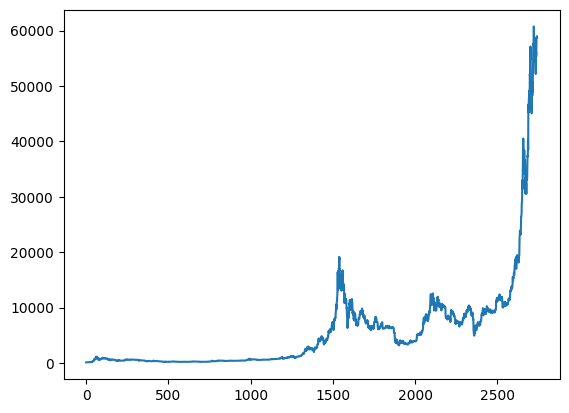

In [5]:
import pandas as pd

df = pd.read_csv('btc.csv')
ys = df['Closing Price (USD)']
ts = df.index

w = Wave(ys, framerate=1)
w.plot()

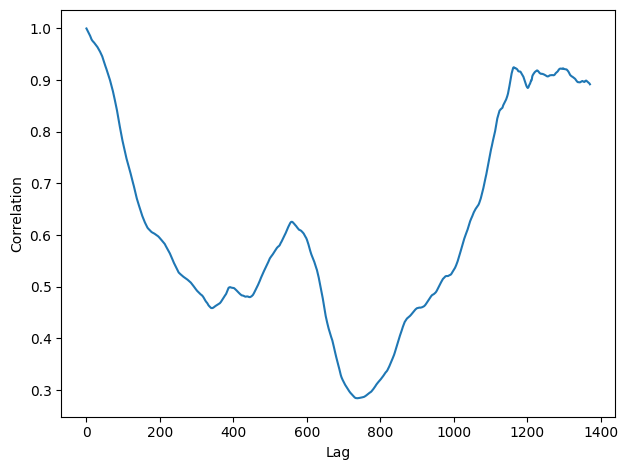

In [6]:
lags, corrs = autocorr(w)
plt.plot(lags, corrs)
decorate(xlabel='Lag',
         ylabel='Correlation')